In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [18]:
df = pd.read_csv("Mobiles Dataset (2025).csv", encoding="latin-1")

In [5]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [6]:
df.isnull().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [19]:
df.shape

(930, 15)

In [9]:
df.duplicated().sum() # the dataset has 15 duplicate rows, they should be removed before analysis begins

15

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [11]:
df.describe()

,Launched Year
count,930.000000
mean,2023.161290
std,29.629971
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2924.000000


In [20]:
def clean_numeric(value):
    if isinstance(value, str):
        value = ''.join([c for c in value if c.isdigit() or c == '.'])
        parts = value.split('.')
        if len(parts) > 2:
            value = parts[0] + '.' + parts[1]
        return float(value) if value else np.nan
    return value

In [21]:
numeric_columns = [
     "Mobile Weight", "RAM", "Front Camera", "Back Camera",
    "Battery Capacity", "Screen Size", "Launched Price (Pakistan)",
    "Launched Price (India)", "Launched Price (China)",
    "Launched Price (USA)", "Launched Price (Dubai)"
]

In [22]:
numeric_columns = [col for col in numeric_columns if col in df.columns]

In [23]:
df[numeric_columns] = df[numeric_columns].applymap(clean_numeric)
df.dropna(inplace=True)

In [24]:
df.shape

(929, 15)

In [28]:
df.dtypes

Company Name                  object
Model Name                    object
Mobile Weight                float64
RAM                          float64
Front Camera                 float64
Back Camera                  float64
Processor                     object
Battery Capacity             float64
Screen Size                  float64
Launched Price (Pakistan)    float64
Launched Price (India)       float64
Launched Price (China)       float64
Launched Price (USA)         float64
Launched Price (Dubai)       float64
Launched Year                  int64
dtype: object

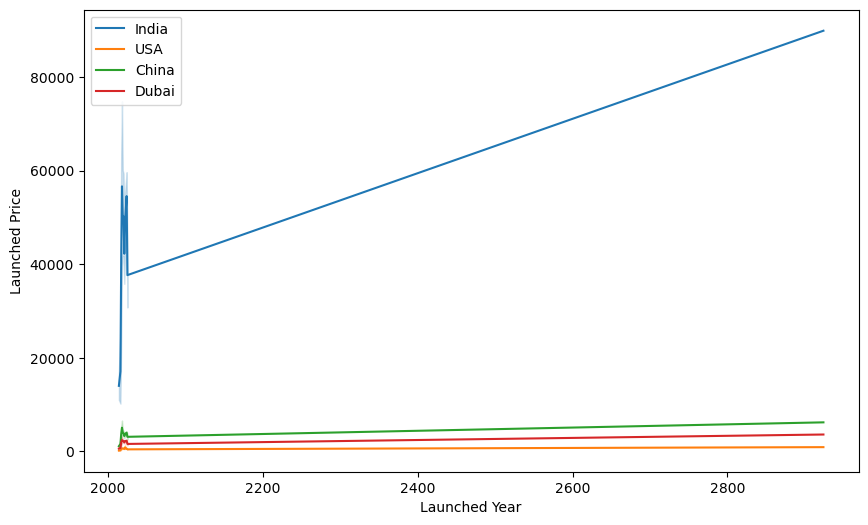

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Launched Year', y='Launched Price (India)', data=df, label='India')
sns.lineplot(x='Launched Year', y='Launched Price (USA)', data=df, label='USA')
sns.lineplot(x='Launched Year', y='Launched Price (China)', data=df, label='China')
sns.lineplot(x='Launched Year', y='Launched Price (Dubai)', data=df, label='Dubai')
plt.xlabel("Launched Year")
plt.ylabel("Launched Price")
plt.legend()
plt.show()

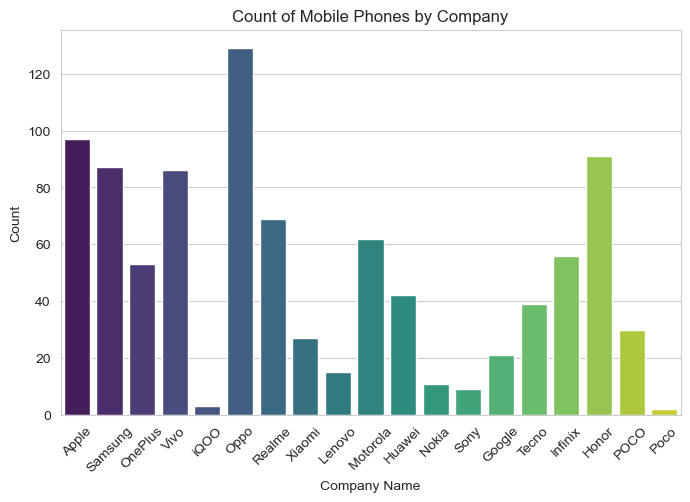

In [32]:
# Set seaborn style
sns.set_style("whitegrid")

# Countplot for Company Name
plt.figure(figsize=(8,5))
sns.countplot(x='Company Name', data=df, palette='viridis')
plt.title("Count of Mobile Phones by Company")
plt.xlabel("Company Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

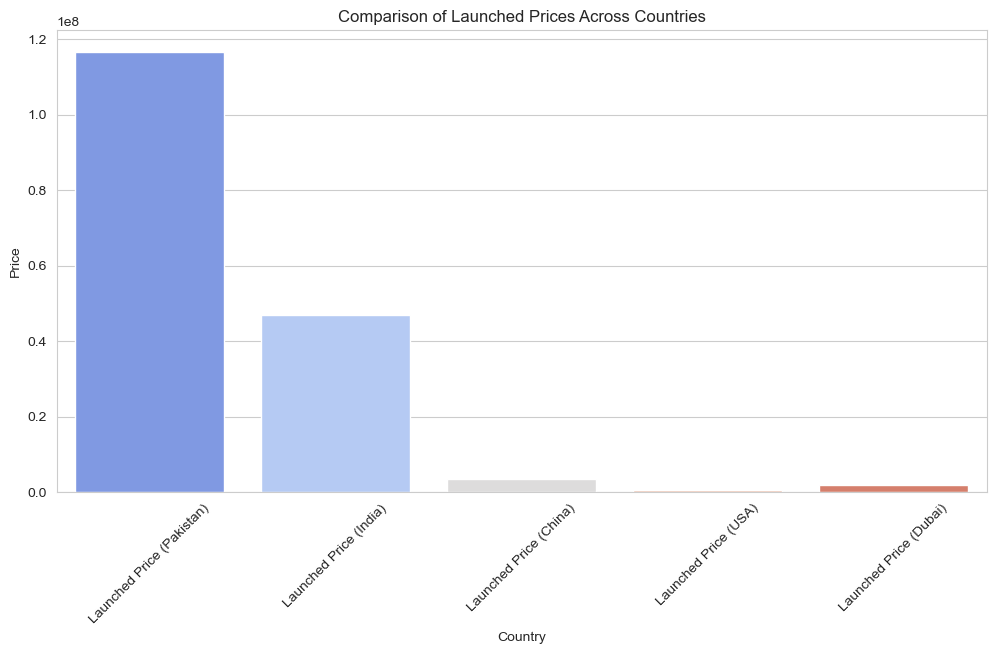

In [33]:
# Bar plot for price comparison across different countries
plt.figure(figsize=(12,6))
price_columns = [
    "Launched Price (Pakistan)", "Launched Price (India)", 
    "Launched Price (China)", "Launched Price (USA)", "Launched Price (Dubai)"
]
data_melted = df.melt(id_vars=["Model Name"], value_vars=price_columns, var_name="Country", 
                      value_name="Price")
sns.barplot(x="Country", y="Price", data=data_melted, estimator=sum, ci=None, palette="coolwarm")
plt.title("Comparison of Launched Prices Across Countries")
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.show()          

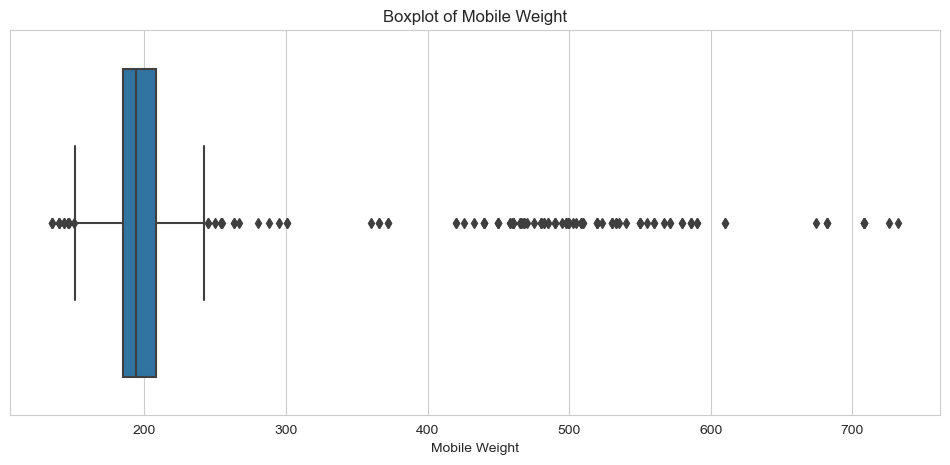

In [34]:
# Boxplot for numerical distributions
plt.figure(figsize=(12,5))
sns.boxplot(x=df["Mobile Weight"])
plt.title("Boxplot of Mobile Weight")
plt.show()

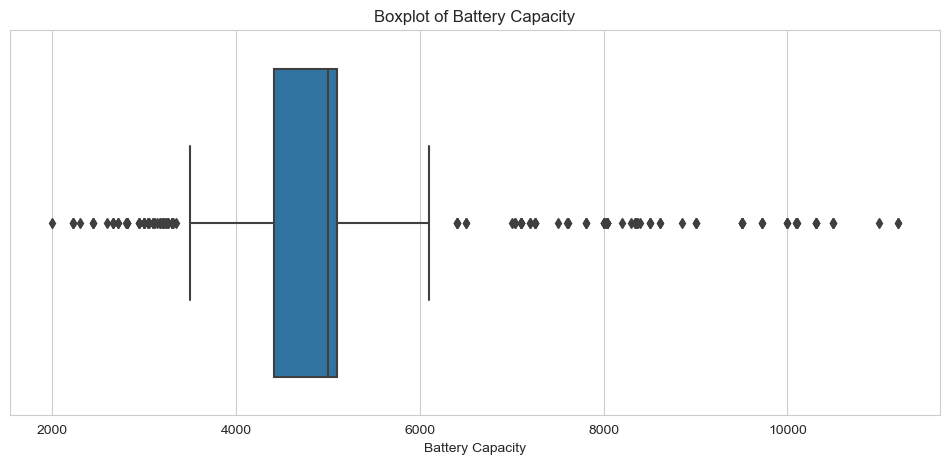

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["Battery Capacity"])
plt.title("Boxplot of Battery Capacity")
plt.show()

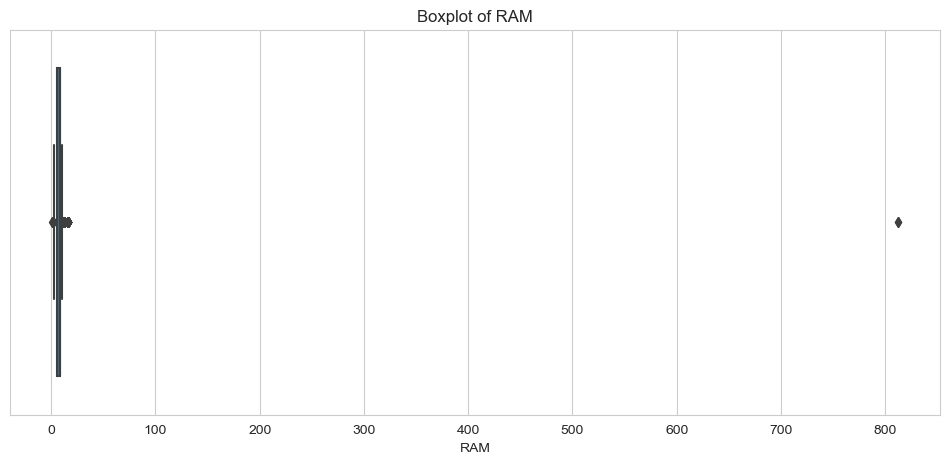

In [38]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["RAM"])
plt.title("Boxplot of RAM")
plt.show()

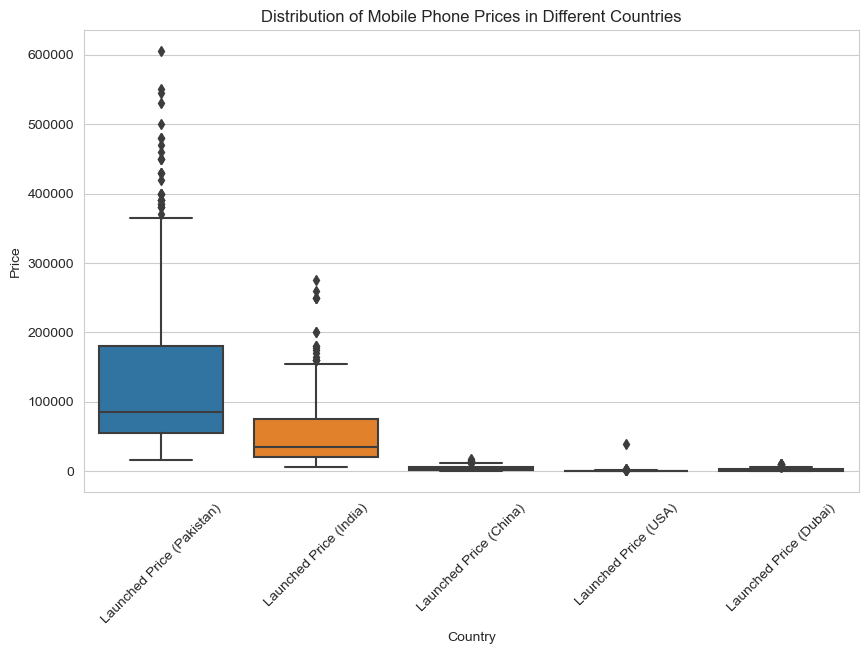

In [39]:
# Boxplot for the Prices in different countries
plt.figure(figsize=(10,6))
price_cols = ['Launched Price (Pakistan)', 'Launched Price (India)', 
              'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
df_melted = df.melt(id_vars=['Launched Year'], value_vars=price_cols, var_name='Country', value_name='Price')
sns.boxplot(x='Country', y='Price', data=df_melted)
plt.xticks(rotation=45)
plt.title("Distribution of Mobile Phone Prices in Different Countries")
plt.show()

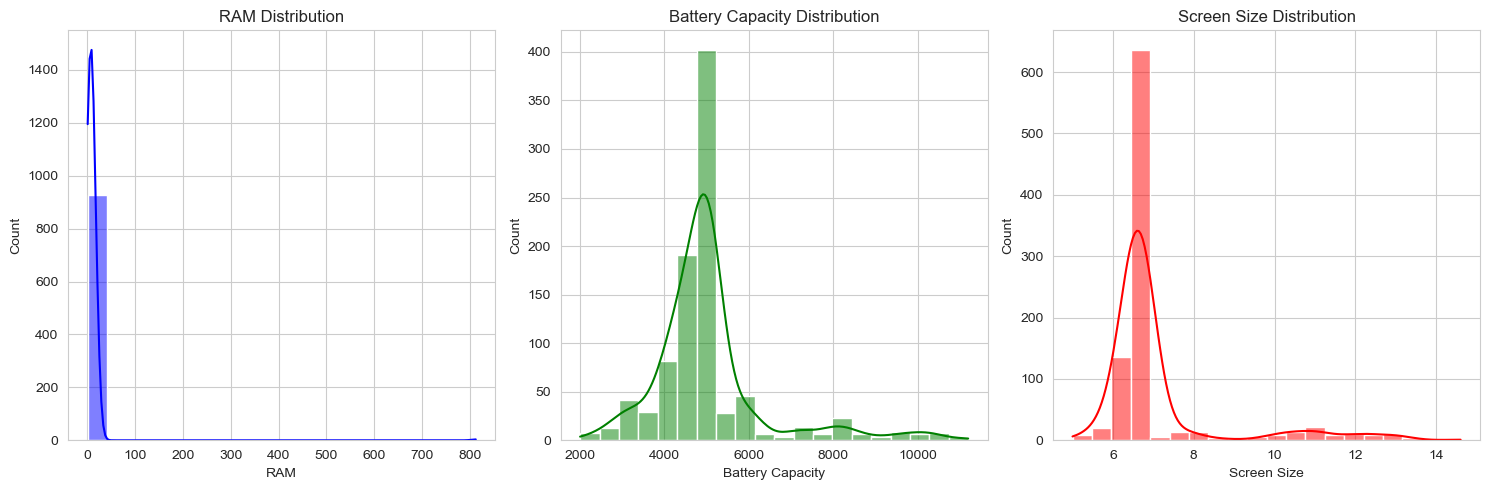

In [40]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.histplot(df['RAM'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("RAM Distribution")

sns.histplot(df['Battery Capacity'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Battery Capacity Distribution")

sns.histplot(df['Screen Size'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title("Screen Size Distribution")

plt.tight_layout()
plt.show()

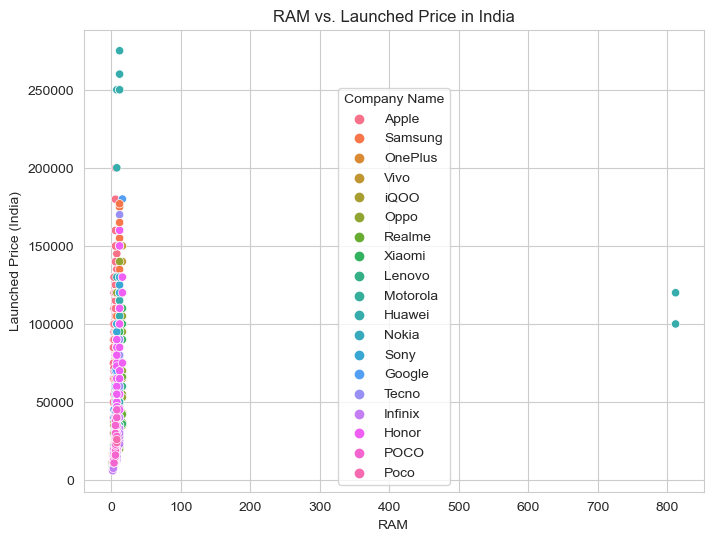

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RAM', y='Launched Price (India)', data=df, hue='Company Name')
plt.title("RAM vs. Launched Price in India")
plt.show()

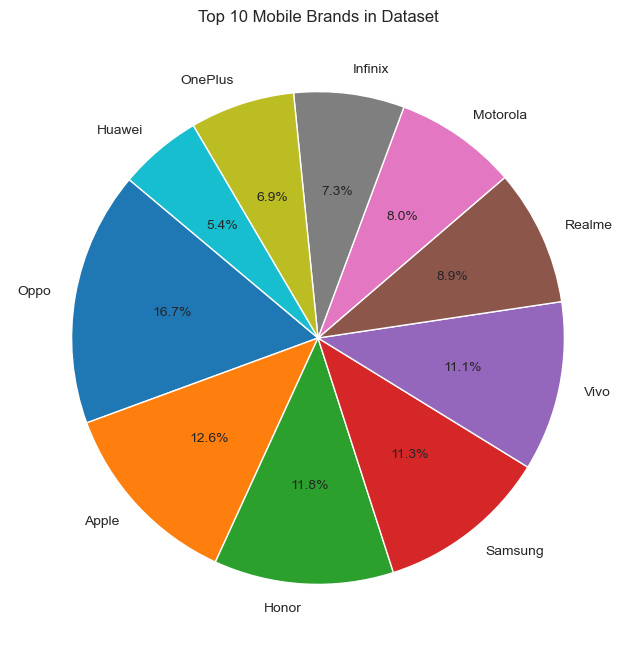

In [42]:
brand_counts = df['Company Name'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(brand_counts[:10], labels=brand_counts.index[:10],autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Mobile Brands in Dataset")
plt.show()

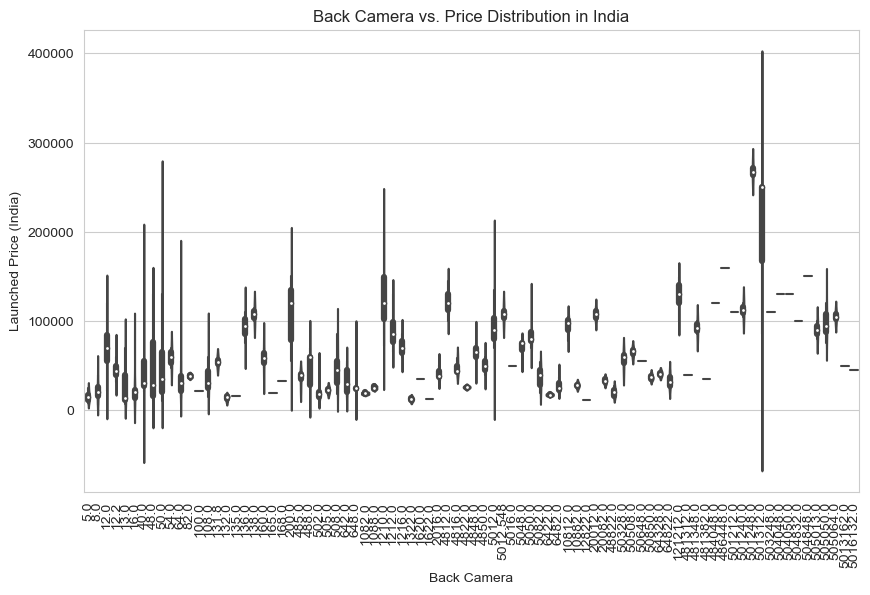

In [43]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Back Camera', y='Launched Price (India)', data=df)
plt.xticks(rotation=90)
plt.title("Back Camera vs. Price Distribution in India")
plt.show()

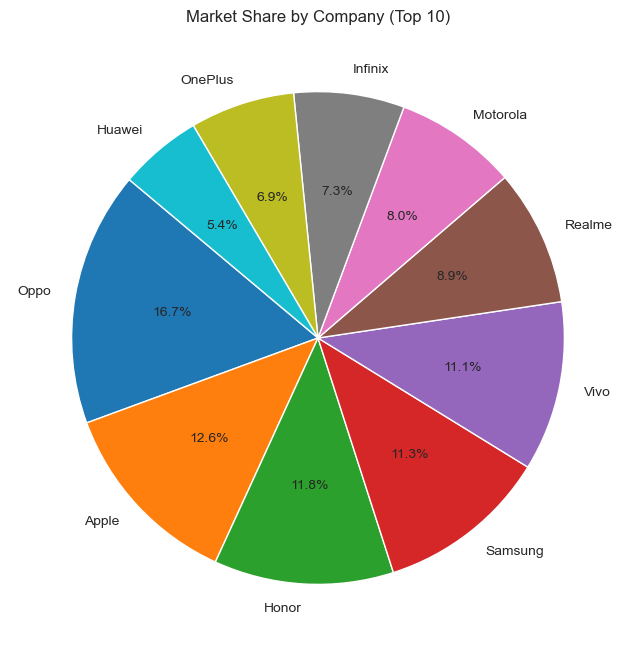

In [46]:
## Market share by Company
company_counts = df["Company Name"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(company_counts[:10], labels=company_counts.index[:10], autopct='%1.1f%%', startangle=140)
plt.title("Market Share by Company (Top 10)")
plt.show()

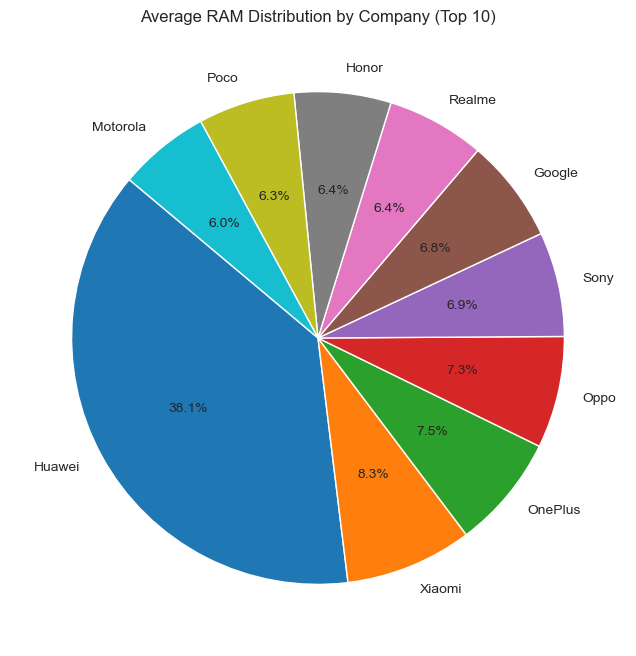

In [47]:
## Average RAM distribution
avg_ram = df.groupby("Company Name")["RAM"].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,8))
plt.pie(avg_ram, labels=avg_ram.index, autopct='%1.1f%%', startangle=140)
plt.title("Average RAM Distribution by Company (Top 10)")
plt.show()

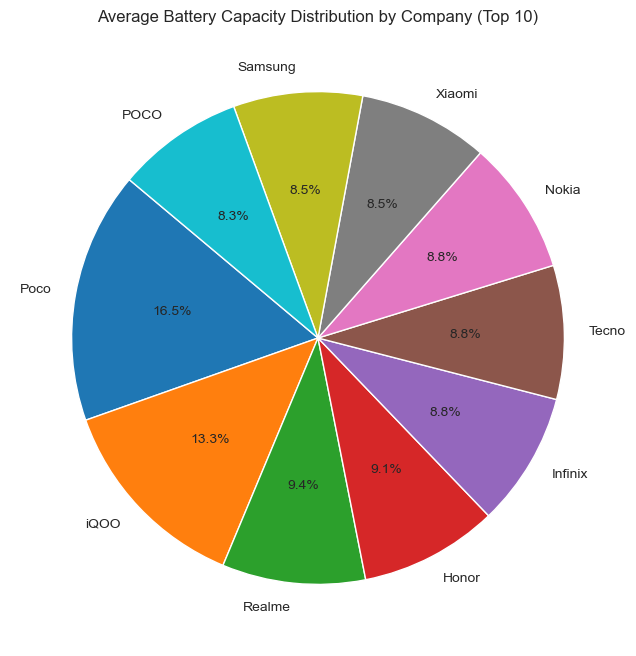

In [50]:
avg_battery = df.groupby("Company Name")["Battery Capacity"].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,8))
plt.pie(avg_battery, labels=avg_battery.index, autopct='%1.1f%%', startangle=140)
plt.title("Average Battery Capacity Distribution by Company (Top 10)")
plt.show()

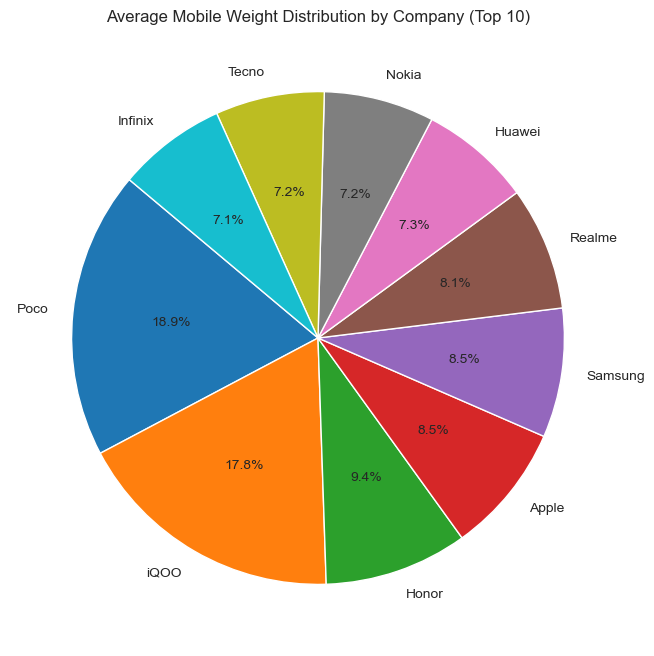

In [51]:
avg_weight=df.groupby("Company Name")["Mobile Weight"].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(8,8))
plt.pie(avg_weight, labels=avg_weight.index, autopct='%1.1f%%', startangle=140)
plt.title("Average Mobile Weight Distribution by Company (Top 10)")
plt.show()

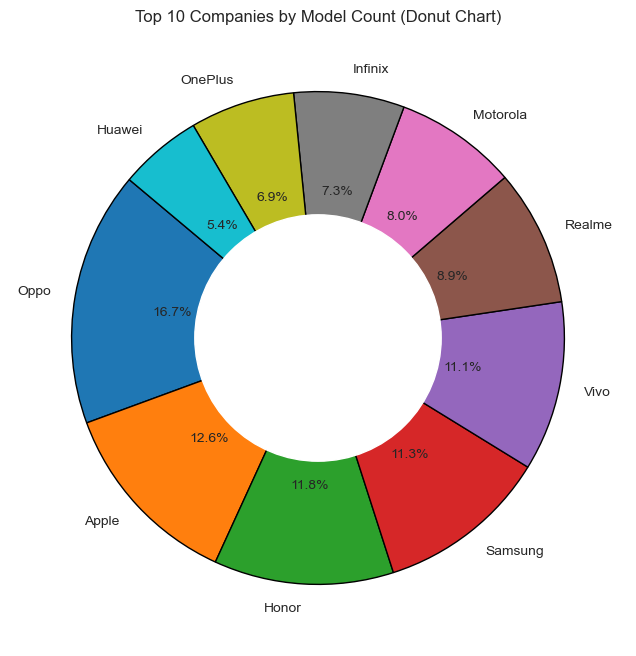

In [54]:
plt.figure(figsize=(8,8))
company_counts = df["Company Name"].value_counts().head(10)
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.gca().add_artist(plt.Circle((0,0), 0.5, fc='white'))  # create the donut effect
plt.title("Top 10 Companies by Model Count (Donut Chart)")
plt.show()

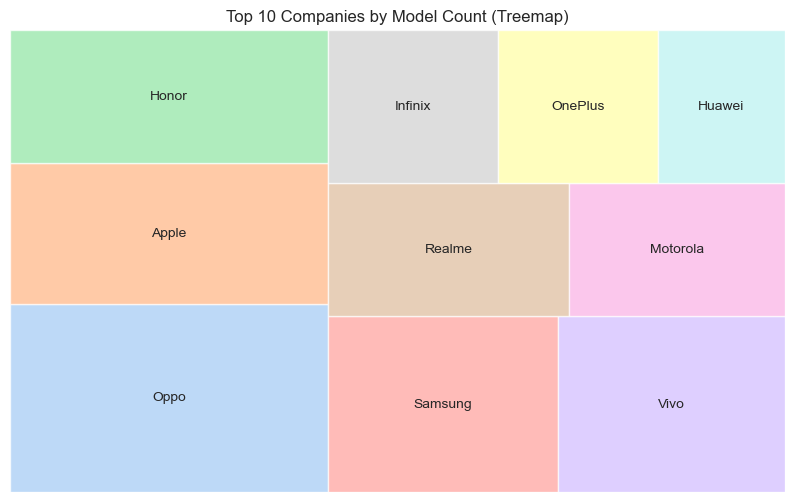

In [57]:
import squarify  

company_counts = df["Company Name"].value_counts().head(10)
plt.figure(figsize=(10, 6))
squarify.plot(sizes=company_counts, label=company_counts.index, alpha=0.7, color=sns.color_palette("pastel"))
plt.title("Top 10 Companies by Model Count (Treemap)")
plt.axis("off")
plt.show()

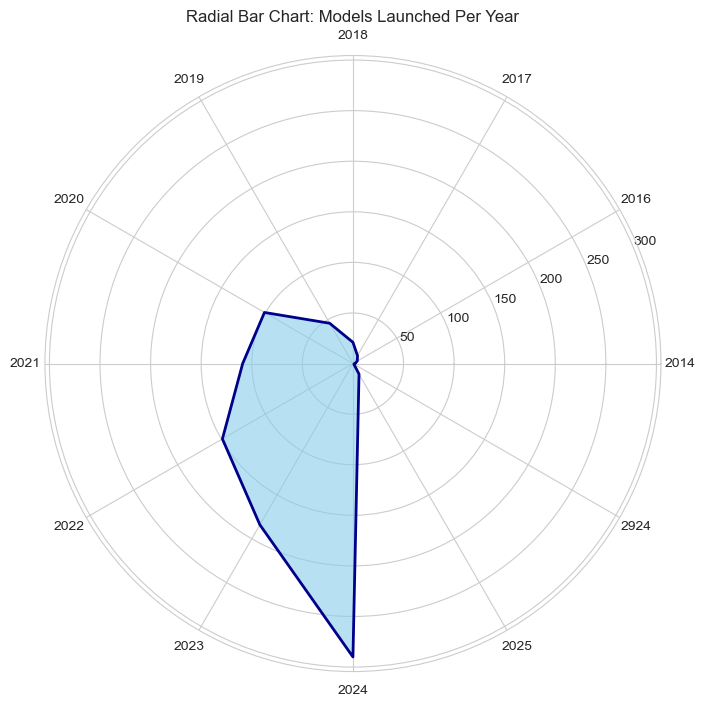

In [58]:
from math import pi  

launch_year_counts = df["Launched Year"].value_counts().sort_index()
categories = launch_year_counts.index
values = launch_year_counts.values

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
values = list(values) + [values[0]]  # Loop back to start for a closed chart
angles += [angles[0]]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.fill(angles, values, color='skyblue', alpha=0.6)
ax.plot(angles, values, color='darkblue', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title("Radial Bar Chart: Models Launched Per Year")
plt.show()

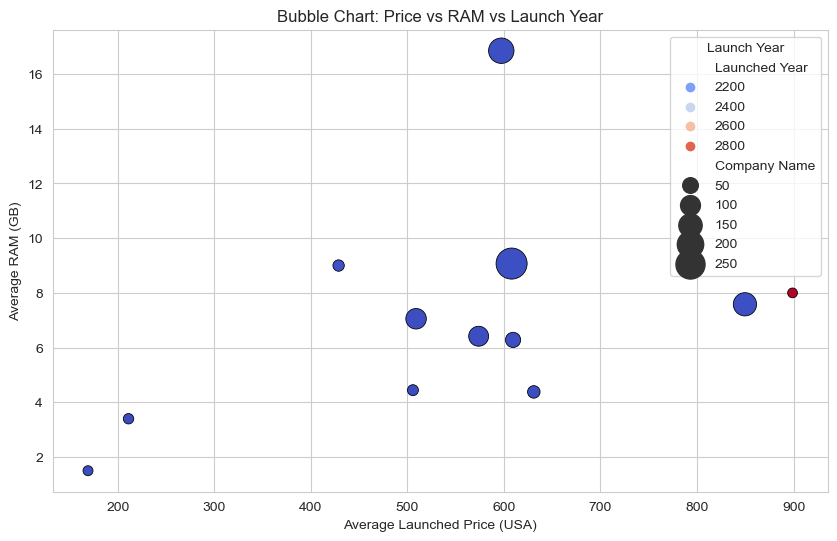

In [59]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby("Launched Year").agg({"Launched Price (USA)": "mean", "RAM": "mean", "Company Name": "count"}).reset_index()
sns.scatterplot(x="Launched Price (USA)", y="RAM", size="Company Name", hue="Launched Year", data=df_grouped, sizes=(50, 500), palette="coolwarm", edgecolor="black")
plt.title("Bubble Chart: Price vs RAM vs Launch Year")
plt.xlabel("Average Launched Price (USA)")
plt.ylabel("Average RAM (GB)")
plt.legend(title="Launch Year")
plt.show()

In [60]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,259999.0,94999.0,6499.0,949.0,3399.0,2024


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [66]:
label_encoder = LabelEncoder()
df['Company Name'] = label_encoder.fit_transform(df['Company Name'])
df["Processor"] = label_encoder.fit_transform(df["Processor"])

In [67]:
## Select features and the target variable
feat = ["Mobile Weight", "RAM", "Front Camera", "Back Camera", "Battery Capacity", "Screen Size"]
target = "Launched Price (India)" ## choose the target column

In [69]:
X = df[feat]
y = df[target]

In [71]:
## split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [72]:
## Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [73]:
## Define Regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "CatBoost": CatBoostRegressor(verbose=0)  # silent output
}

In [78]:
# Step 9: Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data

    # Step 10: Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = [mae, rmse, r2]
# Step 11: Convert results into a DataFrame
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R2"]).T

# Step 12: Print performance metrics
print(results_df)

                            MAE          RMSE        R2
Linear Regression  26246.486289  34182.039504  0.257448
Ridge Regression   26286.015438  34210.638180  0.256205
Lasso Regression   26248.935550  34184.608732  0.257336
Decision Tree      35817.715054  53014.817798 -0.786181
Random Forest      27729.145321  38471.096134  0.059411
Gradient Boosting  25030.780474  33757.473560  0.275780
XGBoost            26964.460956  39240.694175  0.021402
KNN Regressor      16169.402151  22248.531700  0.685418
SVR                29563.577750  42523.785322 -0.149198
CatBoost           25518.625857  35339.754647  0.206297


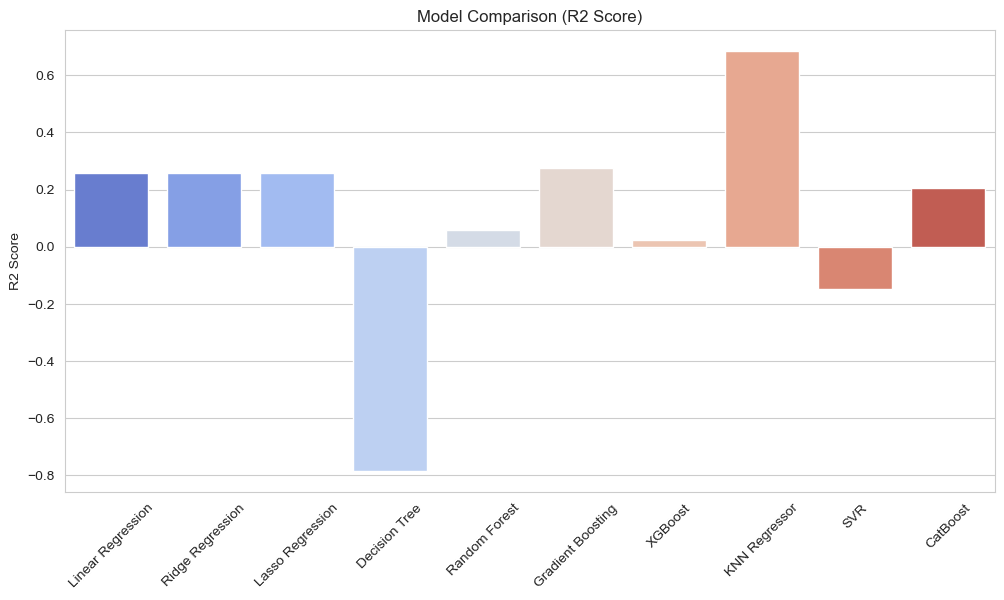

In [79]:
## Visualize the performance
plt.figure(figsize=(12,6))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Model Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.show()

In [81]:
## Best model
best_model = results_df["R2"].idxmax()
print(f"Best model: {best_model} with R² Score = {results_df.loc[best_model, 'R2']:.4f}")

Best model: KNN Regressor with R² Score = 0.6854


In [82]:
X = df.drop(columns=["Launched Price (USA)", "Model Name"])  # Remove model name & target
y = df["Launched Price (USA)"]

In [83]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [84]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 134.07979047831518
MSE: 32219.483081254886
R2 Score: 0.8099473083984646


In [85]:
# Train model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree:
MAE: 32.925156359918915
MSE: 5707.085263923877
R2 Score: 0.9663356822679992


In [86]:
# Train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest:
MAE: 27.384281617887048
MSE: 2632.862803486459
R2 Score: 0.98446956268174


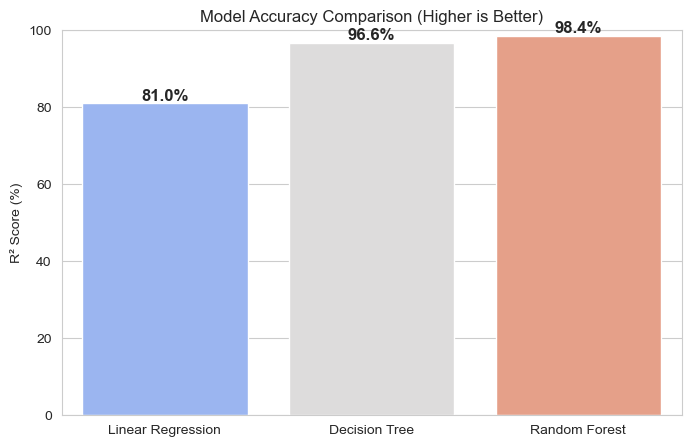

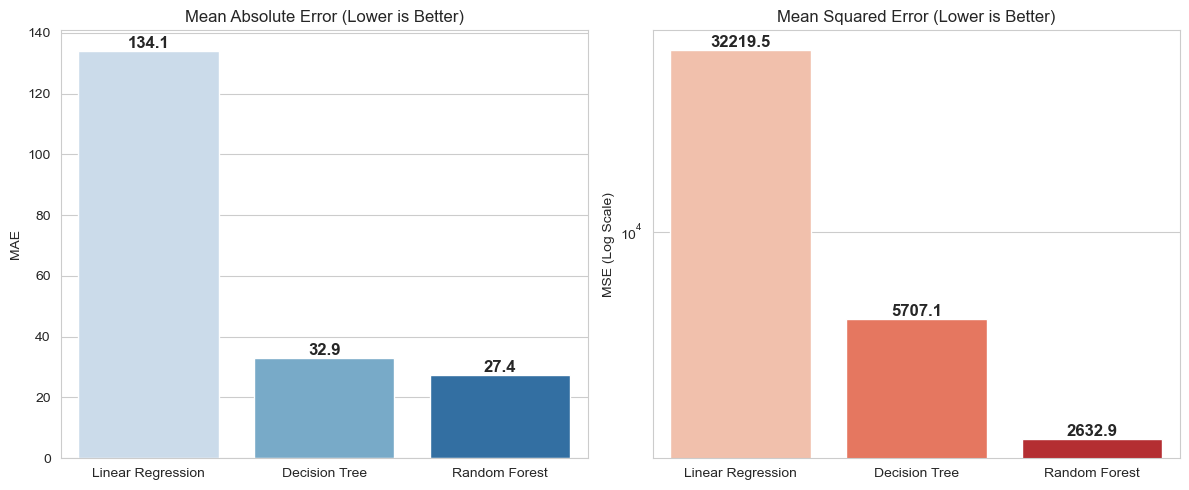

In [87]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred) * 100  # Convert R² score to percentage
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results[name] = {"R2 Score (%)": r2, "MAE": mae, "MSE": mse}

df_results = pd.DataFrame(results).T

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df_results.index, y=df_results["R2 Score (%)"], palette="coolwarm")
plt.ylim(0, 100)  # Set percentage range
plt.ylabel("R² Score (%)")
plt.title("Model Accuracy Comparison (Higher is Better)")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = sns.barplot(x=df_results.index, y=df_results["MAE"], ax=axes[0], palette="Blues")
axes[0].set_title("Mean Absolute Error (Lower is Better)")
axes[0].set_ylabel("MAE")

# Add values on bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}',  
                 (p.get_x() + p.get_width() / 2, p.get_height()),  
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# MSE (Log Scale)
ax2 = sns.barplot(x=df_results.index, y=df_results["MSE"], ax=axes[1], palette="Reds")
axes[1].set_title("Mean Squared Error (Lower is Better)")
axes[1].set_ylabel("MSE (Log Scale)")
axes[1].set_yscale("log")  # Use log scale for better visibility

# Add values on bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}',  
                 (p.get_x() + p.get_width() / 2, p.get_height()),  
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()